In [2]:
import numpy as np
import emcee
import seaborn as sns
import pandas as pd
import scipy
import scipy.optimize
import scipy.integrate
import matplotlib.pyplot as plt
import dlsfunctions as dls

In [3]:
%%latex
This Bayes Take 5 is another simulation-based trial in which simulation data similar to Bayes Take 4 is used. However, the primary difference lies in the added Gaussian noise into the simulation data. 

<IPython.core.display.Latex object>

In [5]:
# let's generate some noise!
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
sigma = 5e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

In [47]:
noise = np.random.normal(diameter, sigma/2, 200)*1e7

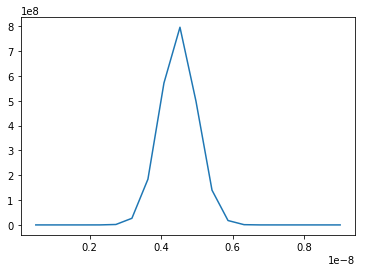

In [19]:
plt.plot(d, f_1)

In [39]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [40]:
theta_in = np.append(f_1, beta)

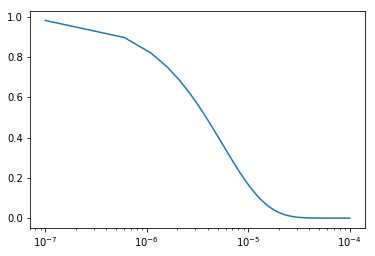

In [41]:
simulated_data_1 = dls.g2(theta_in, d, m, gamma, time_in)
plt.semilogx(time_in, simulated_data_1)

In [48]:
noisy_simulated_data_1 = noise + simulated_data_1

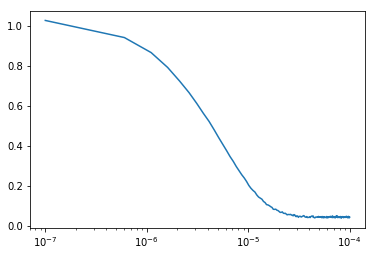

In [49]:
plt.semilogx(time_in, noisy_simulated_data_1)

In [57]:
ndim = 21
nwalkers = 100
nsteps = 2500

In [58]:
start_pos = [theta_in + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [59]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, noisy_simulated_data_1, m, gamma, time_in))

In [60]:
result = sampler.run_mcmc(start_pos, nsteps)

In [61]:
sampler.acceptance_fraction

array([0.3612, 0.3596, 0.366 , 0.3704, 0.3548, 0.3712, 0.3748, 0.362 ,
       0.3488, 0.3564, 0.36  , 0.3456, 0.3572, 0.37  , 0.3656, 0.344 ,
       0.3668, 0.3556, 0.3608, 0.3576, 0.364 , 0.3596, 0.342 , 0.364 ,
       0.3536, 0.3704, 0.354 , 0.3748, 0.346 , 0.37  , 0.3476, 0.37  ,
       0.3424, 0.3832, 0.3652, 0.3592, 0.3568, 0.368 , 0.3688, 0.3392,
       0.3572, 0.3624, 0.354 , 0.356 , 0.3548, 0.376 , 0.3568, 0.3692,
       0.3536, 0.3468, 0.3768, 0.3644, 0.3372, 0.3564, 0.3644, 0.3728,
       0.36  , 0.35  , 0.36  , 0.37  , 0.3588, 0.3756, 0.3736, 0.3708,
       0.3664, 0.354 , 0.3728, 0.3612, 0.3392, 0.3596, 0.3564, 0.366 ,
       0.3592, 0.3696, 0.3504, 0.3596, 0.3668, 0.3748, 0.3756, 0.3528,
       0.3704, 0.3656, 0.3736, 0.3688, 0.3468, 0.376 , 0.3528, 0.3656,
       0.356 , 0.3584, 0.3552, 0.36  , 0.3504, 0.346 , 0.3568, 0.38  ,
       0.3772, 0.3764, 0.3588, 0.3776])

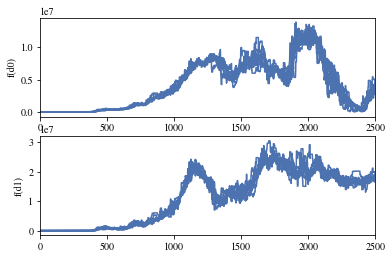

In [62]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

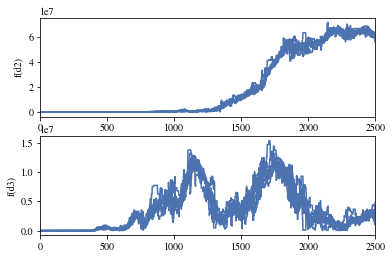

In [63]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

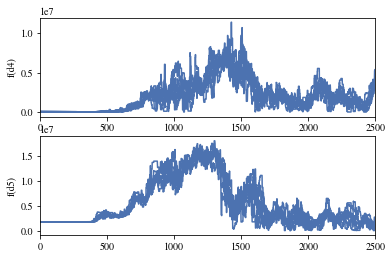

In [64]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax4, ax5) = plt.subplots(2)
ax4.set(ylabel='f(d4)')
ax5.set(ylabel='f(d5)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 4], ax=ax4)
    sns.tsplot(sampler.chain[j, :, 5], ax=ax5)

In [67]:
# prior for beta, do enzyme data
# Since it takes about 150 steps for the walkers to settle, trim the data to include only steps after 100
samples = sampler.chain[:,2000:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [68]:
q

,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,8.318532e+05,1.605642e+07,4.811496e+08,1.806004e+08,1.904199e+07,4.763346e+05,1.452806e+06,5.989425e+07,4.902019e+07,4.694775e+06,4.187816e+07,2.596900e+07,5.622152e+07,8.411835e+05,8.294431e+05,1.206009e+06,1.030424e+06,2.329131e+08,5.445417e+08,7.961083e+08
0.50,3.250952e+06,1.785955e+07,4.880986e+08,1.833887e+08,2.560917e+07,1.539847e+06,3.454182e+06,6.475576e+07,6.268874e+07,6.312770e+06,4.728942e+07,3.307067e+07,6.242457e+07,1.846539e+06,1.712757e+06,2.160759e+06,1.840162e+06,2.358960e+08,5.470667e+08,8.034211e+08
0.84,9.639436e+06,2.079791e+07,4.943684e+08,1.854722e+08,2.987507e+07,2.433329e+06,5.585601e+06,6.713175e+07,7.284563e+07,8.234118e+06,4.895409e+07,3.858214e+07,6.524994e+07,2.854730e+06,2.923745e+06,3.334727e+06,2.886230e+06,2.379870e+08,5.521009e+08,8.093219e+08


In [69]:
fifty_q = np.zeros(20)

fifty_q[0] = 3.251e6
fifty_q[1] = 1.786e7
fifty_q[2] = 6.2425e7
fifty_q[3] = 1.847e6
fifty_q[4] = 1.7128e6
fifty_q[5] = 2.161e6
fifty_q[6] = 1.84e6
fifty_q[7] = 2.359e8
fifty_q[8] = 5.46e8
fifty_q[9] = 8.03e8
fifty_q[10] = 4.881e8
fifty_q[11] = 1.834e8
fifty_q[12] = 2.561e7
fifty_q[13] = 1.54e6
fifty_q[14] = 3.454e6
fifty_q[15] = 6.476e7
fifty_q[16] = 6.27e7
fifty_q[17] = 6.313e6
fifty_q[18] = 4.73e7
fifty_q[19] = 3.31e7

Text(0.5,1,'Inferred distribution from simulated data with noise')

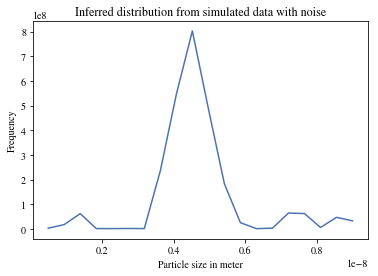

In [73]:
plt.plot(d, fifty_q)
plt.xlabel('Particle size in meter')
plt.ylabel('Frequency')
plt.title('Inferred distribution from simulated data with noise')

Text(0.5,1,'Simulated distribution')

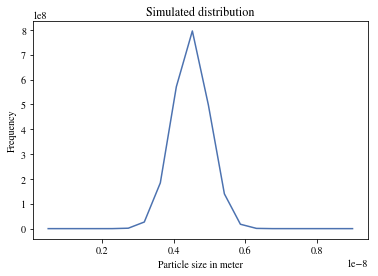

In [74]:
plt.plot(d, f_1)
plt.xlabel('Particle size in meter')
plt.ylabel('Frequency')
plt.title('Simulated distribution')

In [75]:
beta_fifty = 1.174

In [76]:
theta_from_inference = np.append(fifty_q, beta_fifty)

In [77]:
g2_from_inference = dls.g2(theta_from_inference, d, m, gamma, time_in)

Text(0.5,1,'g2 from inferred distribution')

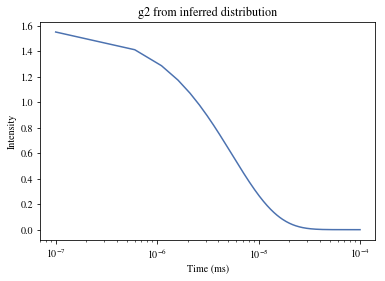

In [78]:
plt.semilogx(time_in, g2_from_inference)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.title('g2 from inferred distribution')

Text(0.5,1,'Residuals from noisy simulation testing')

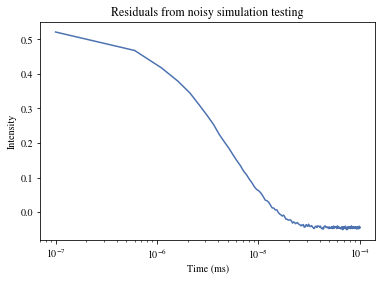

In [79]:
plt.semilogx(time_in, g2_from_inference - noisy_simulated_data_1)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.title('Residuals from noisy simulation testing')